# Simple Linear Regression

In this notebook, we'll build a linear regression model to predict `Sales` using an appropriate predictor variable.

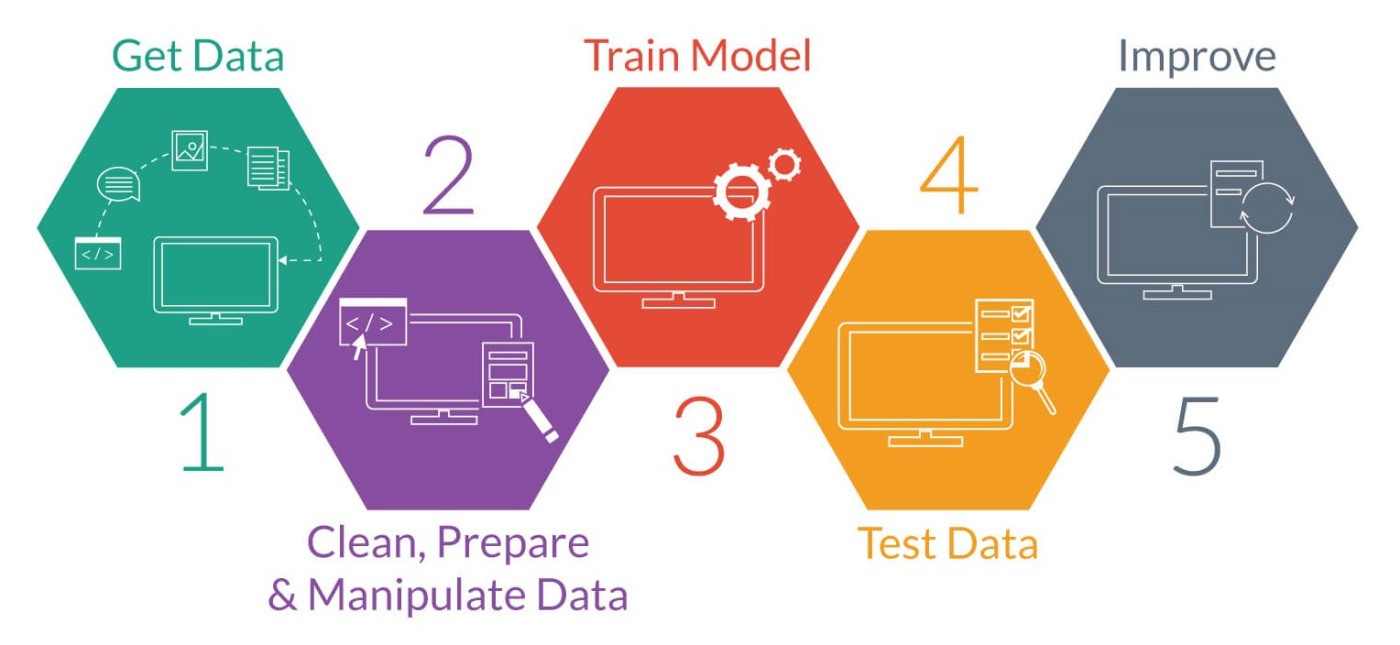

In [1]:
from IPython.display import Image
Image(r"C:\Rahim\Oth\BoardInf\Content\06 ML\work\MLProcess.jpg",height=500, width=900)

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

In [3]:
advertising = pd.read_csv("Advertising.csv")

In [4]:
type(advertising)

pandas.core.frame.DataFrame

In [5]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Visualising the Data

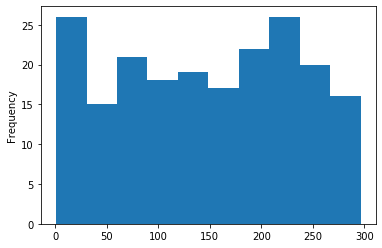

In [9]:
advertising.TV.plot.hist()
plt.show()

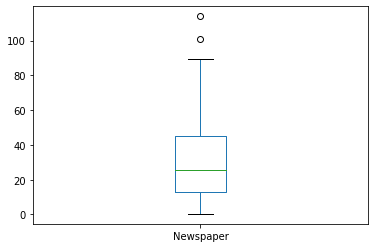

In [10]:
advertising.Newspaper.plot.box()
plt.show()

C:\Users\rahim.baig\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


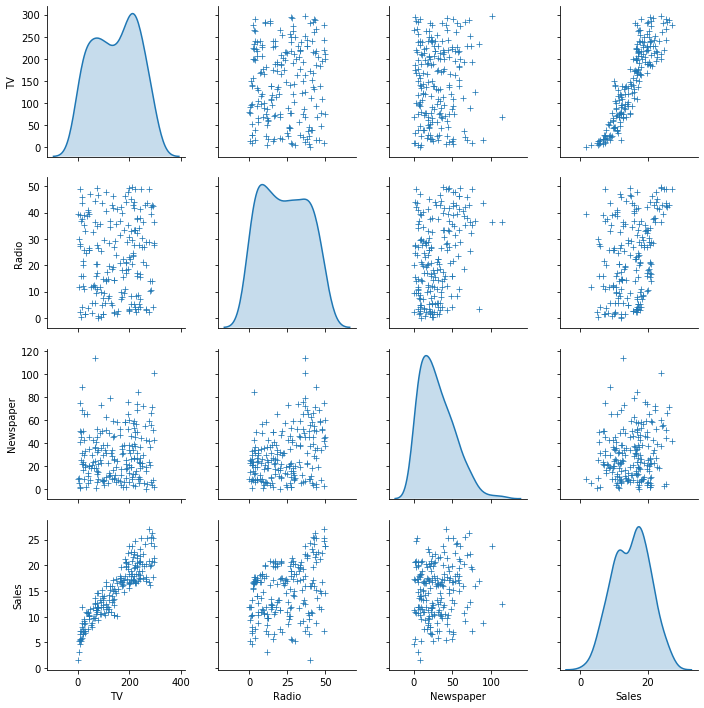

In [11]:
sns.pairplot(advertising, markers="+", diag_kind="kde")
plt.show()

C:\Users\rahim.baig\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


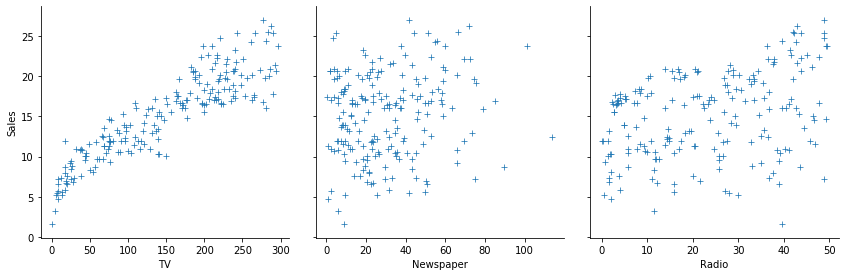

In [12]:
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', markers="+", size=4)
plt.show()

### Correlations between variables

In [13]:
corrs = advertising.corr()
corrs

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


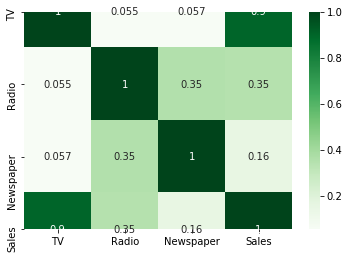

In [15]:
sns.heatmap(corrs, annot=True, cmap="Greens")
plt.show()

As is visible from the pairplot and the heatmap, the variable `TV` seems to be most correlated with `Sales`. So let's go ahead and perform simple linear regression using `TV` as our feature variable.

---
## Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

### Generic Steps in model building

We first assign the feature variable, `TV`, in this case, to the variable `X` and the response variable, `Sales`, to the variable `y`.

In [17]:
X = advertising[['TV']]
y = advertising['Sales']

In [18]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [19]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

#### Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [20]:
from sklearn.model_selection import train_test_split

In [17]:
?train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

In [23]:
X_train.shape, X_test.shape

((140, 1), (60, 1))

### Regression model using SciKit Learn

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
#Instantiating the linear regression model
mod = LinearRegression()

In [26]:
mod.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
mod.intercept_, mod.coef_

(6.948683200001357, array([0.05454575]))

From the parameters that we get, our linear regression equation becomes:

$ Sales = 6.948 + 0.054 \times TV $

In [28]:
from sklearn.metrics import r2_score

In [29]:
y_train_pred = mod.predict(X_train)

In [30]:
r2_score(y_train, y_train_pred)

0.8157933136480389

## Building a multiple linear regression model

### Train-test split and some  pre-processing

In [31]:
df_train, df_test = train_test_split(advertising, train_size = 0.7, random_state = 100)

In [32]:
df_train.shape, df_test.shape

((140, 4), (60, 4))

In [33]:
df_train.head()

,TV,Radio,Newspaper,Sales
74,213.4,24.6,13.1,17.0
3,151.5,41.3,58.5,16.5
185,205.0,45.1,19.6,22.6
26,142.9,29.3,12.6,15.0
90,134.3,4.9,9.3,14.0


In [34]:
y_train = df_train[['Sales']]
X_train = df_train[['TV', 'Radio']]
y_test = df_test[['Sales']]
X_test = df_test[['TV', 'Radio']]

In [35]:
#Instantiating the linear regression model
mod = LinearRegression()
mod.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
mod.intercept_, mod.coef_

(array([4.42512473]), array([[0.05397593, 0.11374333]]))

In [37]:
y_train_pred = mod.predict(X_train)
r2_score(y_train, y_train_pred)

0.9099642103419103

### Build a model with all 3 variables

In [38]:
y_train = df_train[['Sales']]
X_train = df_train[['TV', 'Radio',"Newspaper"]]
y_test = df_test[['Sales']]
X_test = df_test[['TV', 'Radio',"Newspaper"]]

In [39]:
#Instantiating the linear regression model
mod = LinearRegression()
mod.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
y_train_pred = mod.predict(X_train)
r2_score(y_train, y_train_pred)

0.91049938193816

In [41]:
mod.coef_

array([[0.05382911, 0.11001224, 0.00628995]])

In [42]:
X_train.describe()

,TV,Radio,Newspaper
count,140.000000,140.000000,140.00000
mean,147.711429,22.926429,31.44000
std,92.866185,15.137916,22.62707
min,0.700000,0.000000,0.30000
25%,66.700000,9.900000,13.05000
50%,145.100000,23.200000,24.25000
75%,230.600000,36.525000,45.77500
max,296.400000,49.600000,114.00000


#### Detecting multi-collinearity

In [44]:
y_train = df_train[['Sales']]
X_train = df_train[['TV', 'Radio', 'Newspaper']]

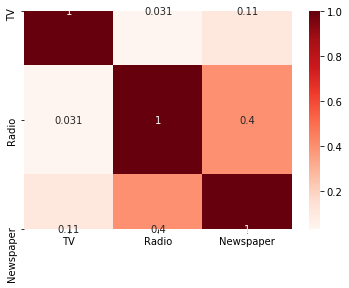

In [45]:
sns.heatmap(X_train.corr(),  cmap = "Reds", annot =True)

In [74]:
X_train.describe()

,TV,Radio,Newspaper
count,140.000000,140.000000,140.00000
mean,147.711429,22.926429,31.44000
std,92.866185,15.137916,22.62707
min,0.700000,0.000000,0.30000
25%,66.700000,9.900000,13.05000
50%,145.100000,23.200000,24.25000
75%,230.600000,36.525000,45.77500
max,296.400000,49.600000,114.00000


#### Pre-processing the features

In [55]:
X_train.describe()

,TV,Radio,Newspaper
count,140.000000,140.000000,140.00000
mean,147.711429,22.926429,31.44000
std,92.866185,15.137916,22.62707
min,0.700000,0.000000,0.30000
25%,66.700000,9.900000,13.05000
50%,145.100000,23.200000,24.25000
75%,230.600000,36.525000,45.77500
max,296.400000,49.600000,114.00000


In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
scaler = MinMaxScaler()

In [68]:
?scaler

#### Pre-processing the features

In [58]:
num_vars = ['TV', 'Radio']

In [59]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

C:\Users\rahim.baig\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\rahim.baig\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3498: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\rahim.baig\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [ ]:
(X - min)/ (max - min)

In [60]:
scaler.data_max_

array([296.4,  49.6])

In [61]:
X_train.describe()

,TV,Radio,Newspaper
count,140.000000,140.000000,140.00000
mean,0.497164,0.462226,31.44000
std,0.314055,0.305200,22.62707
min,0.000000,0.000000,0.30000
25%,0.223199,0.199597,13.05000
50%,0.488333,0.467742,24.25000
75%,0.777477,0.736391,45.77500
max,1.000000,1.000000,114.00000


### Linear Regression using SciKit Learn

In [77]:
from sklearn.linear_model import LinearRegression

In [63]:
lr = LinearRegression()

In [64]:
lr.fit(X_train[["TV","Radio"]], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
X_train.columns.values

array(['TV', 'Radio'], dtype=object)

In [81]:
lr.coef_

array([[15.96068139,  5.64166927]])

In [62]:
mod.coef_

array([[0.05397593, 0.11374333]])

In [86]:
lr.intercept_

array([4.37416322])

In [65]:
y_train_pred = lr.predict(X_train[['TV', 'Radio']])
r2_score(y_train, y_train_pred)

0.9099642103419103

In [37]:
y_train_pred = mod.predict(X_train)
r2_score(y_train, y_train_pred)

0.9099642103419103

### Calculating Variance Inflation Factor

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
?variance_inflation_factor

In [47]:
X_train.head()

,TV,Radio,Newspaper
74,213.4,24.6,13.1
3,151.5,41.3,58.5
185,205.0,45.1,19.6
26,142.9,29.3,12.6
90,134.3,4.9,9.3


In [51]:
variance_inflation_factor(X_train.values, 2)

3.263332447091966

In [53]:
[variance_inflation_factor(X_train.values, ind) for ind in range(3)]

[2.3422965232575863, 3.213540875709984, 3.263332447091966]

In [54]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Newspaper,3.26
1,Radio,3.21
0,TV,2.34


### What is a good feature selection approach?
#### Stastically significant
 - hypothesis testing
 - Null hypothesis?  
     -- There is no association between X and y
     -- the beta coefficient is 0  

H0: coefficient is 0  
H1: coefficient is non-zero

#### We will use statsmodel for getting these value

In [66]:
import statsmodels.api as sm

In [67]:
X_train.head()

,TV,Radio,Newspaper
74,0.719310,0.495968,13.1
3,0.509976,0.832661,58.5
185,0.690903,0.909274,19.6
26,0.480893,0.590726,12.6
90,0.451809,0.098790,9.3


Add intercept manually for statsmodel to work

In [69]:
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV,Radio,Newspaper
74,1.0,0.719310,0.495968,13.1
3,1.0,0.509976,0.832661,58.5
185,1.0,0.690903,0.909274,19.6
26,1.0,0.480893,0.590726,12.6
90,1.0,0.451809,0.098790,9.3


In [70]:
lr = sm.OLS(y_train, X_train_sm).fit()

In [71]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     461.2
Date:                Sat, 30 Nov 2019   Prob (F-statistic):           4.73e-71
Time:                        20:29:35   Log-Likelihood:                -270.60
No. Observations:                 140   AIC:                             549.2
Df Residuals:                     136   BIC:                             561.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3723      0.356     12.267      0.000       3.667       5.077
TV            15.9173      0.461     34.539      0.000      15.006      16.829
Radio          5.4566      0.514     10.609      0.000       4.439       6.474
Newspaper      0.0063      0.007      0.902      0.369      -0.008       0.020
==============================================================================
Omnibus:                       18.669   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.404
Skew:                          -0.643   Prob(JB):                     1.52e-07
Kurtosis:                       4.932   Cond. No.                         154.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Newspaper,3.26
1,Radio,3.21
0,TV,2.33


In [73]:
X_train_sm = sm.add_constant(X_train[["TV","Radio"]])

C:\Users\rahim.baig\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [80]:
lr = sm.OLS(y_train, X_train_sm).fit()

In [81]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     692.3
Date:                Sat, 30 Nov 2019   Prob (F-statistic):           2.38e-72
Time:                        20:40:15   Log-Likelihood:                -271.02
No. Observations:                 140   AIC:                             548.0
Df Residuals:                     137   BIC:                             556.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4629      0.342     13.060      0.000       3.787       5.139
TV            15.9607      0.458     34.848      0.000      15.055      16.866
Radio          5.6417      0.471     11.970      0.000       4.710       6.574
==============================================================================
Omnibus:                       21.428   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.728
Skew:                          -0.716   Prob(JB):                     6.42e-09
Kurtosis:                       5.102   Cond. No.                         4.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[["TV","Radio"]].columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train[["TV","Radio"]].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Radio,3.21
0,TV,2.33


### Recursive Feature Elimination
 - using sklearn

In [82]:
from sklearn.feature_selection import RFE

In [84]:
lr = LinearRegression()

In [85]:
?RFE

In [86]:
rfe = RFE(lr, 2)

In [88]:
num_vars = ["TV","Radio","Newspaper"]

In [89]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

C:\Users\rahim.baig\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\rahim.baig\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3498: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\rahim.baig\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [91]:
X_train.describe()

,TV,Radio,Newspaper
count,140.000000,140.000000,140.000000
mean,0.497164,0.462226,0.273879
std,0.314055,0.305200,0.199007
min,0.000000,0.000000,0.000000
25%,0.223199,0.199597,0.112137
50%,0.488333,0.467742,0.210642
75%,0.777477,0.736391,0.399956
max,1.000000,1.000000,1.000000


In [92]:
rfe.fit(X_train, y_train)

C:\Users\rahim.baig\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=2, step=1, verbose=0)

In [93]:
rfe.ranking_

array([1, 1, 2])

In [94]:
rfe.support_

array([ True,  True, False])

In [96]:
X_train.columns[rfe.support_]

Index(['TV', 'Radio'], dtype='object')